# helper code for visualizing and other

In [437]:
import copy
import numpy as np
import os
import sys
import pickle


class PickleHelper:
    DEFAULT_PROTOCOL = 5  # Default protocol set to 5

    @classmethod
    def _check_pkl(cls, name):
        """Ensure the file name has a .pkl extension."""
        if not name.endswith('.pkl'):
            return name + '.pkl'
        return name

    @classmethod
    def save(cls, obj, name, protocol=None):
        """Save an object to a file using pickle."""
        if protocol is None:
            protocol = cls.DEFAULT_PROTOCOL
        with open(cls._check_pkl(name), 'wb') as f:
            pickle.dump(obj, f, protocol=protocol)

    @classmethod
    def load(cls, name):
        """Load an object from a pickle file."""
        with open(cls._check_pkl(name), 'rb') as f:
            return pickle.load(f)

def get_class_info(c, sort_by_type=True, include_underscore_vars=False, return_name_and_type=False, end_prev_len=40):
    def get_len_or_shape(x_in):
        which_one = None
        try:
            len_or_shape_out = str(len(x_in))
            which_one = 'length'
            if type(x_in).__module__ == np.__name__:
                len_or_shape_out = str(x_in.shape)
                which_one = 'shape '
        except:
            if which_one is None:
                len_or_shape_out = 'None'
                which_one = 'None  '
        return len_or_shape_out, which_one

    names = []
    len_or_shape = []
    len_or_shape_which_one = []
    type_to_print = []

    for k in dir(c):
        if include_underscore_vars is False and k[0] != '_':

            tmp1 = str(type(eval('c.' + k)))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(k)
            a, b = get_len_or_shape(eval('c.' + names[-1]))
            len_or_shape.append(a)
            len_or_shape_which_one.append(b)
        elif include_underscore_vars:
            tmp1 = str(type(eval('c.' + k)))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(k)
            a, b = get_len_or_shape(eval('c.' + names[-1]))
            len_or_shape.append(a)
            len_or_shape_which_one.append(b)
    len_space = ' ' * max(len(k) for k in names)
    len_space_type = ' ' * max(len(k) for k in type_to_print)
    len_space_shape = ' ' * max(len(k) for k in len_or_shape)
    if sort_by_type:
        ind_array = np.argsort(type_to_print)
    else:
        ind_array = np.argsort(names)

    for i in ind_array:
        k1 = names[i]
        k2 = type_to_print[i]
        k5 = len_or_shape[i]
        x = eval('c.' + names[i])
        k3 = str(x)
        k1 = (k1 + len_space)[:len(len_space)]
        k2 = (k2 + len_space_type)[:len(len_space_type)]
        k5 = (k5 + len_space_shape)[:len(len_space_shape)]
        if len(k3) > end_prev_len:
            k3 = '...' + k3[-end_prev_len:]
        else:
            k3 = '> ' + k3[-end_prev_len:]
        print(k1 + ' type->   ' + k2 + '  ' + len_or_shape_which_one[i] + '->   ' + k5 + '  ' + k3)
    if return_name_and_type:
        return names, type_to_print


def get_dict_info(c, sort_by_type=True, include_underscore_vars=False, return_name_and_type=False, end_prev_len=30):
    names = []
    type_to_print = []
    for k in c.keys():
        if include_underscore_vars is False and str(k)[0] != '_':
            tmp1 = str(type(c[k]))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(str(k))
        elif include_underscore_vars:
            tmp1 = str(type(c[k]))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(str(k))
    len_space = ' ' * max(len(k) for k in names)
    len_space_type = ' ' * max(len(k) for k in type_to_print)
    if sort_by_type:
        ind_array = np.argsort(type_to_print)
    else:
        ind_array = np.argsort(names)

    for i in ind_array:
        k1 = names[i]
        k2 = type_to_print[i]

        if names[i] not in list(c.keys()):
          names[i] = eval(names[i])
        try:
            k3 = str(c[names[i]])
        except:
            k3 = str(c[float(names[i])])


        k1 = (k1 + len_space)[:len(len_space)]
        k2 = (k2 + len_space_type)[:len(len_space_type)]

        if len(k3) > end_prev_len:
            k3 = '...' + k3[-end_prev_len:]
        else:
            k3 = '> ' + k3[-end_prev_len:]

        if 'numpy.ndarray' in k2:
            k4 = str(c[names[i]].shape)
            k4_str = '   shape-> '
        else:
            try:
                k4 = str(len(c[names[i]]))
                k4_str = '   len-> '
            except:
                k4_str = '   None->'
                k4 = 'None'

        print(k1 + ' type->   ' + k2 + k4_str + k4 + '  ' + k3)
    if return_name_and_type:
        return names, type_to_print

def get_class_info2(c, sort_by=None, include_underscore_vars=False, return_name_and_type=False, end_prev_len=30):
    def get_len_or_shape(x_in):
        which_one = None
        try:
            len_or_shape_out = str(len(x_in))
            which_one = 'length'
            if type(x_in).__module__ == np.__name__:
                len_or_shape_out = str(x_in.shape)
                which_one = 'shape '
        except:
            if which_one is None:
                len_or_shape_out = 'None'
                which_one = 'None  '
        return len_or_shape_out, which_one

    names = []
    len_or_shape = []
    len_or_shape_which_one = []
    type_to_print = []

    for k in dir(c):
        if include_underscore_vars is False and k[0] != '_':

            tmp1 = str(type(eval('c.' + k)))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(k)
            a, b = get_len_or_shape(eval('c.' + names[-1]))
            len_or_shape.append(a)
            len_or_shape_which_one.append(b)
        elif include_underscore_vars:
            tmp1 = str(type(eval('c.' + k)))
            type_to_print.append(tmp1.split("""'""")[-2])
            names.append(k)
            a, b = get_len_or_shape(eval('c.' + names[-1]))
            len_or_shape.append(a)
            len_or_shape_which_one.append(b)
    len_space = ' ' * max(len(k) for k in names)
    len_space_type = ' ' * max(len(k) for k in type_to_print)
    len_space_shape = ' ' * max(len(k) for k in len_or_shape)
    if sort_by is None:
        ind_array = np.arange(len(names))
    elif 'type' in sort_by.lower():
        ind_array = np.argsort(type_to_print)
    elif 'len' in sort_by.lower() or 'shape' in sort_by.lower():
        np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
        tmp1 = np.asarray([eval(k) for k in len_or_shape])
        tmp1[tmp1 == None] = np.nan
        tmp1 = [np.max(iii) for iii in tmp1]
        ind_array = np.argsort(tmp1)
    elif 'name' in sort_by.lower():
        ind_array = np.argsort(names)
    else:
        ind_array = np.arange(len(names))

    for i in ind_array:
        k1 = names[i]
        k2 = type_to_print[i]
        k5 = len_or_shape[i]
        x = eval('c.' + names[i])
        k3 = str(x)
        k1 = (k1 + len_space)[:len(len_space)]
        k2 = (k2 + len_space_type)[:len(len_space_type)]
        k5 = (k5 + len_space_shape)[:len(len_space_shape)]
        if len(k3) > end_prev_len:
            k3 = '...' + k3[-end_prev_len:]
        else:
            k3 = '> ' + k3[-end_prev_len:]
        print(k1 + ' type->   ' + k2 + '  ' + len_or_shape_which_one[i] + '->   ' + k5 + '  ' + k3)
    if return_name_and_type:
        return names, type_to_print




def info(x):
    if isinstance(x, dict):
        print('type is dict')
        get_dict_info(x)
    elif isinstance(x, list):
        try:
            x = copy.deepcopy(np.asarray(x))
            print('type is list, converting a copy to numpy array to print this info')
            np_stats(x)
        except:
            print(
                "type is a list that can't be converted to a numpy array for printing info or maybe data format is not compatible")

    elif type(x).__module__ == np.__name__:
        print('type is np array')
        np_stats(x)
    else:
        try:
            print('type is ' + str(type(x)) + ' will try printing using "get_class_info2" ')
            get_class_info2(x)
        except:
            print('cant find out what to do with input of type')
            print(type(x))



def np_stats(in_arr):
    print('\nmin', np.min(in_arr))
    print('max', np.max(in_arr))
    print('mean', np.mean(in_arr))
    print('shape', in_arr.shape)
    print('len of unique', len(np.unique(in_arr)))
    print('type', type(in_arr))
    try:
        print('Dtype ', in_arr.dtype)
    except:
        pass



In [438]:


class info_dict:
    def __init__(self):
        # Part-based color settings
        self.key_color = "\033[1;30m"
        self.type_beginning_color = "\033[90m"
        self.type_color = "\033[34m"  # Blue
        self.len_beginning_color = "\033[90m"
        self.len_value_color = "\033[34m"  # Blue
        self.len_na_color = "\033[90m"
        self.preview_color = "\x1b[91m"  # "\033[38;5;208m"
        self.shape_beginning_color = "\033[90m"  # Dark gray for "shape: "
        self.shape_value_color = "\033[34m"  # Blue for shape's values
        self.reset = "\033[0m"

    def is_numpy_array(self, value):
        return isinstance(value, np.ndarray)

    def get_length_or_shape(self, value):
        if self.is_numpy_array(value):
            return f"{self.shape_beginning_color}shape: {self.reset}{self.shape_value_color}{value.shape}{self.reset}"
        elif hasattr(value, '__len__') and not isinstance(value, str):
            return f"{self.len_value_color}{len(value)}{self.reset}"
        else:
            return f"{self.len_na_color}N/A{self.reset}"

    def format_value(self, value):
        length_or_shape_str = self.get_length_or_shape(value)
        preview_str = str(value)
        preview = f"{preview_str[:100]}..." if len(preview_str) > 100 else preview_str
        preview = f"{self.preview_color}{preview}{self.reset}"
        type_name = f"{self.type_color}{type(value).__name__}{self.reset}"
        label = "shape: " if self.is_numpy_array(value) else "len: "
        type_len_str = f"{self.type_beginning_color}type: {self.reset}{type_name}, {self.len_beginning_color if not self.is_numpy_array(value) else self.shape_beginning_color}{label}{self.reset}{length_or_shape_str}"
        return type_len_str, preview

    def get_max_lengths(self, items):
        max_key_len = max((len(str(key)) for key, _ in items), default=0)
        max_type_len = max((len(self.format_value(value)[0]) for _, value in items), default=0)
        return max_key_len, max_type_len

    def print_filtered_tree(self, current_level, keys_path, prefix='', level=0):
        if not isinstance(current_level, dict):
            print(f"{prefix} {self.format_value(current_level)[0]}")
            return
        keys_to_process = keys_path[level] if level < len(keys_path) else ['*']
        items = [(key, current_level[key]) for key in current_level if '*' in keys_to_process or key in keys_to_process]
        max_key_len, _ = self.get_max_lengths(items)
        for i, (key, value) in enumerate(items):
            type_len_str, preview = self.format_value(value)
            is_last = i == len(items) - 1
            connector = '└── ' if is_last else '├── '
            aligned_key_str = f"{str(key):<{max_key_len}}"
            print(f"{prefix}{connector}{self.key_color}{aligned_key_str}{self.reset}: {type_len_str} {preview}")
            if isinstance(value, dict) and level + 1 < len(keys_path):
                next_prefix = f"{prefix}{'    ' if is_last else '│   '}"
                self.print_filtered_tree(value, keys_path, next_prefix, level + 1)

    @classmethod
    def vis(cls, d, keys_path=None):
        instance = cls()
        if not keys_path:
            all_sub_dirs = [['*']]*100
            instance.print_filtered_tree(d, all_sub_dirs, '')
        else:
            instance.print_filtered_tree(d, keys_path, '')

# # for selecting certain sub paths
# ##### your_dictionary = TAM.optuna
# keys_path = [['Full_model'], ['*'], ['best_value', 'study']]
# info_dict.vis(your_dictionary, keys_path)

# # # for everything
# # info_dict.vis(your_dictionary)

In [439]:
# list_specific_packages.py
import pkg_resources

# List of packages you want to find versions for
package_list = [
    'pip', 'setuptools', 'wheel', 'numpy', 'pandas', 'tqdm', 
    'python-dotenv', 'natsort', 'matplotlib', 'scikit-learn', 
    'pytz', 'seaborn', 'pyarrow', 'shap', 'joblib', 'optuna', 
    'ipykernel', 'notebook', 'ipywidgets', 'plotly'
]

# Fetch installed packages
installed_packages = {d.project_name.lower(): d.version for d in pkg_resources.working_set}

# Prepare the requirements format
requirements = []
for package in package_list:
    version = installed_packages.get(package.lower())
    if version:
        requirements.append(f"{package}=={version}")

requirements_format = "\n".join(requirements)
print(requirements_format)


pip==24.0
setuptools==69.2.0
wheel==0.43.0
numpy==1.26.4
pandas==2.2.1
tqdm==4.66.2
python-dotenv==1.0.1
natsort==8.4.0
matplotlib==3.8.3
scikit-learn==1.4.1.post1
pytz==2024.1
seaborn==0.13.2
pyarrow==15.0.2
shap==0.45.0
joblib==1.3.2
optuna==3.6.1
ipykernel==6.29.4
notebook==7.1.2
ipywidgets==8.1.2
plotly==5.20.0


# Core code

In [440]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import copy 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from optuna.samplers import TPESampler

from datetime import datetime
from sklearn.preprocessing import LabelEncoder



# set up all classes and functions

## utils

In [441]:
def get_formatted_datetime():
    return datetime.now().strftime("%Y%m%d_%H_%M")




## CLASS FeatureSelection --

In [442]:

class FeatureSelection():
    def __init__(self, hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features=30000, models_to_train=None):

        """
        A class for performing feature selection based on a hierarchical structure of features.
    
        This class supports the identification and selection of top N features based on the interquartile range (IQR),
        within a  given hierarchical context (e.g., superfamily, family, class).
    
        Parameters:
        - hierarchy_keys (List[str]): Keys representing the hierarchical levels (e.g., ['Superfamily_code', 'Family_code', 'Class_v12_code']).
        - hierarchy_levels (List[int]): Numeric representation of each level's hierarchy, where lower numbers indicate higher hierarchy levels.
        - feature_keys (List[str]): List of strings representing the features to be considered for selection.
        - select_top_n_features (int): Number of top features to select based on IQR. Set to None to ignore IQR and define a structure to use with RF 
    
        Attributes:
        - feature_dict (dict): A dictionary to store the selected top N features across different hierarchical levels.
        - ordered_hierarchy_keys (List[str]): Sorted list of hierarchy keys based on their levels.
        - feature_keys (List[str]): See parameters.
        - select_top_n_features (int): See parameters.
        """
        if not all(isinstance(item, str) for item in hierarchy_keys):
            raise TypeError("hierarchy_keys must be a list of strings.")
        if not all(isinstance(item, int) for item in hierarchy_levels):
            raise TypeError("hierarchy_levels must be a list of integers.")

        #idx to DataFrame
        self.selected_feature_dict = {} # for each sub model which features are selected?
        self.sample_dict = {} # for each sub model which samples apply?
        self.target_key_dict = {}

        self.one_outcome_mapping_dict = {}
        
        self.ordered_hierarchy_keys = [key for _, key in sorted(zip(hierarchy_levels, hierarchy_keys))]
        self.n_levels = len(hierarchy_levels)
        
        self.feature_keys = feature_keys
        self.select_top_n_features = select_top_n_features
        self.models_to_train = models_to_train 

        self.IS_RETRAIN_ALL_MODELS = True # used later to determine if we need to join previous model (might delete later) 
        
        # simple alert to indicate we are only training a subset
        if models_to_train is not None:
            self.IS_RETRAIN_ALL_MODELS = False
            x = 'You selected the following subset of models to train:\nFull_model (by default)' 
            for k in models_to_train:
                x+=('\n'+str(k))
            print(x)

        

    def create_pipeline_data(self):
        """
        Extracts important data from the instance and compiles it into a dictionary. used to make the 
        final model save with all important information. 
        
        This method consolidates various types of data, including dictionaries, lists,
        and integers, collected or generated by the class instance into a single output dictionary.
        
        Returns:
            dict: A dictionary containing selected feature information, sample data,
                  target keys, hierarchy information, feature keys, and configuration integers.
        """
        # any of the dictionaries will work because they all have the same global keys
        # for consistnacy I am making a list here of the global keys to reference
        ALL_global_keys = [k for k in self.sample_dict.keys()]
        
        out_dict = {
            'IQR_selected_feature_dict': self.selected_feature_dict,
            'one_outcome_mapping_dict': self.one_outcome_mapping_dict,
            'sample_dict': self.sample_dict,
            'target_key_dict': self.target_key_dict,
            'ordered_hierarchy_keys': self.ordered_hierarchy_keys,
            'ALL_feature_keys': self.feature_keys,
            'n_hierarchy_levels': self.n_levels,
            'IQR_select_top_n_features': self.select_top_n_features,
            'ALL_sample_index': self.ALL_sample_index,
            'ALL_global_keys': ALL_global_keys
        }
        return out_dict

        
    @staticmethod    
    def _calculate_IQR(betas):
        """
        Calculate the interquartile range (IQR) for each feature in the given pandas Series.
    
        Parameters:
        - betas (pd.Series): Pandas Series containing the values from which to calculate the IQR.
    
        Returns:
        - pd.Series: The IQR for each column in the input series.
        """
        return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

    @staticmethod  
    def _get_top_n_IQR_index(IQR, N):
        """
        Selects the top N indices from a pandas Series based on the Interquartile Range (IQR) values.
    
        Parameters:
        - IQR (pd.Series): A pandas Series containing the interquartile ranges of features.
        - N (int, optional): The number of top indices to select based on the highest IQR values.
                             If N is None, all indices are selected, which is useful for initializing
                             the dictionary without filtering by IQR but requiring all valid model
                             node points (where there is more than one class at the model node).
    
        Returns:
        - pd.Index: An index object containing the top N indices from the IQR Series. If N is None,
                    returns the indices for all entries in the IQR Series.
    
        Raises:
        - TypeError: If the input `IQR` is not a pandas Series.
        """
        if N > len(IQR):
            raise ValueError("selects_top_n_features cannot be greater than the number of elements the DataFrame.")
        if not isinstance(IQR, pd.Series):
            raise TypeError("Input must be a pandas Series.")
        if N is None:
            N = len(IQR)
        return IQR.nlargest(N).index        

    def make_feature_selection_dict(self, df): #$% save IQR for all features?? no doesnt make sense, it is easy to calc on the spot when needed
        """
        Constructs a dictionary of selected features based on their IQR, across different hierarchical levels of the given DataFrame.
    
        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and hierarchical information.
    
        This method populates the `feature_dict` attribute with the indices of the top N features, selected based on their IQR, for each hierarchical level and category. "All_samples" is for the highest level model across all features. Other features are automatically categorized by the names in the dataframe.
        """
        # special case where we use all features
        IQR, top_n_features_index, selected_rows_index = self._select_features(df, None, None) # None indicated  this special case
        self.selected_feature_dict['Full_model'] = top_n_features_index
        self.sample_dict['Full_model'] = selected_rows_index
        
        # save for the pipeline dictionary save 
        self.ALL_sample_index = selected_rows_index
        
        for hierarchy_key in self.ordered_hierarchy_keys[:-1]: # all but last one, we arent training models on a single class (end of tree)
            # self.selected_feature_dict[hierarchy_key]={}
            for hierarchy_name in np.unique(df[hierarchy_key]):
                # Check if this combination is in the models_to_train list
                if self.models_to_train is None or (hierarchy_key, hierarchy_name) in self.models_to_train:
                    IQR, top_n_features_index, selected_rows_index = self._select_features(df, hierarchy_key, hierarchy_name)
                    if IQR is not None: # only create if sub class has more than one possible outcome
                        self.selected_feature_dict[(hierarchy_key, hierarchy_name)] = top_n_features_index
                        self.sample_dict[(hierarchy_key, hierarchy_name)] = selected_rows_index

        # define the target keys for future reference. 
        for key, _ in self.selected_feature_dict.items():
            # for full model use all rows/samples for other models use the name to find the next to the right in the hierarchy order 
            target_key = [self.ordered_hierarchy_keys[0] if key == 'Full_model' else self._next_level(key[0])]
            self.target_key_dict[key] = target_key

    

    def _test_if_only_one_outcome(self, hierarchy_key, hierarchy_name, subset_df):
        """
        Tests if a given hierarchical level and name combination in the subset DataFrame has only one possible outcome in the next hierarchical level.
    
        Parameters:
        - hierarchy_key (str): The current hierarchical level's key.
        - hierarchy_name (str): The name of the current category within the hierarchical level.
        - subset_df (pd.DataFrame): The subset DataFrame filtered for the given hierarchy_key and hierarchy_name.
    
        Returns:
        - (bool, str): A tuple where the first element indicates whether only one outcome exists (True if only one, False otherwise),
          and the second element is a message detailing the result.
        """
        # TEST IF ONLY ONE POSSIBLE OUTCOME. 
        # In some cases a level 'P' hierarchy will have only one possible solution for level 'P+1' 
        # e.g. Superfamily_code == 'MENING' only has Family_code == 'MENINGI' so we will not build a model for  
        # MENING to predict the Family_code since their is only one. next_hierarchy_key is here becuase we want 
        # to allow for the edge case of if for example Family_code == 'MENINGI' might have more than one possible 
        # class for example SF(1), F(1), C(2), there the "()" represents how many nodes in a downstream tree. In 
        # this case we would not build a model at SF to predict F, but we WOULD build one at F to predict C. So 
        # next_hierarchy_key represents 'P+1'.
        
        next_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) + 1] # P+1 index
        next_hierarchy_key = self._next_level(hierarchy_key)
        
        index_to_test = [hierarchy_key, next_hierarchy_key] # P and P+1 index
        unique_subset_df = subset_df[index_to_test].reset_index(drop=True)
        test_only_one_option = (unique_subset_df.nunique() == 1).all() # if true don't build a model, b/c only one option

        return_msg = (
            f'SKIPPING... {hierarchy_key:20} {hierarchy_name:20} '
            f'because it only has one {next_hierarchy_key:20} {unique_subset_df[next_hierarchy_key][0]:20}'
        )
        if test_only_one_option:
            # for prediction we need a mapping for these special cases
            one_outcome_mapping = {(hierarchy_key, hierarchy_name): (next_hierarchy_key, unique_subset_df[next_hierarchy_key][0])}
        else:
            one_outcome_mapping = None


        return test_only_one_option, return_msg, one_outcome_mapping
        
    def _test_if_hierarchy_key_in_ordered_hierarchy_keys(self, hierarchy_key):
        """
        Simple test to check if hierarchy_key is in self.ordered_hierarchy_keys
        """
        if hierarchy_key not in self.ordered_hierarchy_keys:
            raise ValueError("hierarchy_key is not in the list of ordered hierarchy keys.")
    
    
    def _next_level(self, hierarchy_key):
        """
        finds the next level based on input (hierarchy_key), e.g. input "Superfamily_code" and it returns "Family_code". More generally, if input is self.ordered_hierarchy_keys[0] it returns self.ordered_hierarchy_keys[1]

        Parameters:
        -hierarchy_key (str): string contained in self.ordered_hierarchy_keys

        Returns:
        - (str): of previous level in self.ordered_hierarchy_keys

        Raises:
        - ValueError: If the input hierarchy_key is not found in self.ordered_hierarchy_keys.
        - IndexError: If the input hierarchy_key is the last element in self.ordered_hierarchy_keys, indicating there is no next level.

        """
        self._test_if_hierarchy_key_in_ordered_hierarchy_keys(hierarchy_key)
        if hierarchy_key == self.ordered_hierarchy_keys[-1]:
            raise IndexError("Input hierarchy_key is the last element in the list; no next level exists.")
            
        next_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) + 1] # P+1 index
        return next_hierarchy_key

    def _previous_level(self, hierarchy_key):
        """
        finds the previous level based on input (hierarchy_key), e.g. input "Family_code" and it returns "Superfamily_code". More generally, if input is self.ordered_hierarchy_keys[1] it returns self.ordered_hierarchy_keys[0]

        Parameters:
        -hierarchy_key (str): string contained in self.ordered_hierarchy_keys

        Returns:
        - (str): of previous level in self.ordered_hierarchy_keys
        """
        self._test_if_hierarchy_key_in_ordered_hierarchy_keys(hierarchy_key)
        if hierarchy_key == self.ordered_hierarchy_keys[0]:
            raise IndexError("Input hierarchy_key is the first element in the list; no previous level exists.")
            
        previous_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) - 1] # P-1 index
        return previous_hierarchy_key
        
    def _select_features(self, df, hierarchy_key, hierarchy_name):
        """
        Selects the top N features based on IQR for a specific hierarchy_key and hierarchy_name, or globally if both are None.
    
        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and hierarchical information.
        - hierarchy_key (str, optional): The hierarchical level's key for which to select features. If None, global feature selection is performed.
        - hierarchy_name (str, optional): The name within the hierarchical level for which to select features.
    
        Returns:
        - (pd.Series, pd.Index): A tuple containing the IQR for the selected features and the indices of the top N features. Returns (None, None) if only one outcome is possible, indicating no need for feature selection.
        """
        if hierarchy_key is None: # special case for when all features (for first model which predicts most major class e.g. super family)
            # This will select all rows and keep in the same format as the rows selected in the else statement
            selected_rows_index = pd.Series(True, index=df.index)
            # select rows for this hierarchy
            subset_df = df.loc[selected_rows_index]

        else:
            selected_rows_index = df[hierarchy_key] == hierarchy_name
            # select rows for this hierarchy 
            subset_df = df.loc[selected_rows_index]
            
            only_one_outcome_test, return_msg, one_outcome_mapping  = self._test_if_only_one_outcome(hierarchy_key, hierarchy_name, subset_df)
            if only_one_outcome_test:
                print(return_msg)
                self.one_outcome_mapping_dict.update(one_outcome_mapping)
                return None, None, None
   
            
        
        IQR = self._calculate_IQR(subset_df[self.feature_keys]) # get IQR of only the features (ignore the target labels)
        top_n_features_index = self._get_top_n_IQR_index(IQR, self.select_top_n_features) # select to N IQR values
        return IQR, top_n_features_index, selected_rows_index





## CLASS DefaultModels -- RF that matched the R code to the best of my ability



In [443]:
class DefaultModels():
    @classmethod
    def random_forrest(cls):
        """
        Initializes a RandomForestClassifier with default parameters.
        
        Returns:
            RandomForestClassifier: An instance of RandomForestClassifier with preset parameters.
        """
        rf = RandomForestClassifier(
        n_estimators=500,                                 # matches the R code provided
        criterion='gini',                                 # matches the R code provided, default for classification 
        max_depth=None,                 # no equivalent in the R code provided
        min_samples_split=2,            # no equivalent in the R code provided
        min_samples_leaf=1,                               # no equivalent in the R code provided -- set to 1 so it is irrelivent 
        min_weight_fraction_leaf=0.0,   # no equivalent in the R code provided
        max_features='sqrt',                              # same as "mtry" in R, "sqrt(p)" is default in R 
        max_leaf_nodes=None,                              # same as "maxnode" default in R is NULL eq to None in python
        min_impurity_decrease=0.0,                        # no equivalent in the R, set to 0 to match R (I assume since there is no param for this)
        bootstrap=True,                                   # consistant with R when set to True: when R code "replace" is set to True
        oob_score=False,                                  # for Python it is default accuracy (but can be customized, for R param "err.rate" is kinda the same but not sure which metric
        n_jobs=None,                     # num jobs run in parallel
        random_state=42,                 # equivalent is set.seed -- not set in R code provided 
        verbose=0,                       # 
        warm_start=False,                # no equivalent in the R, default in python is False
        class_weight=None,               # no equivalent in the R, it would be wise to use this for our data
        ccp_alpha=0.0,                   # no equivalent in the R, default in python is 0 
        max_samples=None                 # no equivalent in the R, realted to "sampsize", instead of fraction it is a count and can be stratified per class
        )
        return rf
        
    # @classmethod
    # def k_nearest_neighbors(cls):
        
# DefaultModels.random_forrest()

## CLASS RandomForestFeatureSelection --for selecting features based on RF

In [444]:
"""
ALL_global_keys

pipeline_data_class



"""
class RandomForestFeatureSelection():
    def __init__(self, pipeline_data_class, select_top_n_features=10000):
        # # Initialize class attributes with copies from `fclass`
        # self.selected_feature_dict = copy.deepcopy(pipeline_data_class.selected_feature_dict)
        # self.sample_dict = copy.deepcopy(pipeline_data_class.sample_dict)
        # self.ordered_hierarchy_keys = copy.deepcopy(pipeline_data_class.ordered_hierarchy_keys)
        # self.target_key_dict = copy.deepcopy(pipeline_data_class.target_key_dict)

        
        self.select_top_n_features = select_top_n_features
        
        # Initialize dictionaries to store RF models and feature importances
        self.RF_feature_selection_model_dict = {}
        self.RF_feature_importance_dict = {}
        self.RF_selected_features = {}


        
        self.data = pipeline_data_class
        
        # self.data.selected_feature_dict
        # self.data.sample_dict
        # self.data.ordered_hierarchy_keys
        # self.data.target_key_dict
        # self.data.ALL_global_keys

    def _get_important_information(self):
        """
        Retrieves important information for the pipeline.
        
        Returns:
            dict: A dictionary containing RandomForest feature importances, model information, and selected feature indices.
   
        """
        return {
            'RF_feature_importance_dict': self.RF_feature_importance_dict,
            'RF_feature_selection_model_dict': self.RF_feature_selection_model_dict,
            'RF_selected_feature_dict': self.RF_selected_features
        }
        
    def update_pipeline_data(self, pipeline_data):
        """
        Updates the given pipeline data with additional important information.
        
        Args:
            pipeline_data (dict): The current data of the pipeline to be updated.
        
        Returns:
            dict: The updated or newly created dictionary containing comprehensive data for versioning the ML pipeline,
              including feature importances, model information, and selected feature indices.
        """
        new_pipeline_data = self._get_important_information()
        pipeline_data.update(new_pipeline_data)
        return pipeline_data


    def run_RF_feature_selection(self, df, rf=None):
        """
        Runs feature selection using a RandomForestClassifier.

        Iterates over features and samples, subsets the DataFrame based on these features and samples, 
        and uses a provided or a default RandomForestClassifier to fit the data, updating class 
        attributes with models and feature importances.

        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and target variables.
        - rf (RandomForestClassifier, optional): A pre-initialized RandomForestClassifier instance. 
                                                  If None, a new classifier with predefined settings is created.

        Returns:
        - tuple: A tuple containing two dictionaries, `RF_feature_selection_model_dict` and `RF_feature_importance_dict`,
                 mapping feature selection scenarios to fitted RandomForestClassifier instances and feature importances, respectively.
        """
        for global_key in self.data['ALL_global_keys']:
            
            feature_col_idx = self.data['IQR_selected_feature_dict'][global_key]                        
            sample_row_idx = self.data['sample_dict'][global_key]            
            target_key = self.data['target_key_dict'][global_key]
            
            combined_columns = target_key + feature_col_idx.tolist()
            selected_df = df.loc[sample_row_idx, combined_columns]

            if rf is None: #if user doesnt pass in RF model use the default
                rf = DefaultModels.random_forrest()

            X = selected_df[feature_col_idx]  # Feature matrix
            y = selected_df[target_key].iloc[:, 0]  # Target variable, [:, 0] is to flatten it to 1D

            rf.fit(X, y)
            
            self.RF_feature_selection_model_dict[global_key] = rf
            self.RF_feature_importance_dict[global_key] = rf.feature_importances_

            # grab top N features 
            selected_features_idx = np.argsort(rf.feature_importances_)[::-1][:self.select_top_n_features] # [::-1] to flip so largest to smallest
            # save them to a dictionary for later
            self.RF_selected_features[global_key] = [feature_col_idx[f_idx] for f_idx in selected_features_idx]
            

# RFFS = RandomForestFeatureSelection(fclass, select_top_n_features=3)
# RFFS.run_RF_feature_selection(df)

# RF_feature_selection_model_dict, RF_feature_importance_dict = run_RF_feature_selection(df, fclass, rf=None)
# Feature importances from the model
# feature_importances = rf.feature_importances_


## CLASS DefaultOptunaStudies

In [445]:

class DefaultOptunaStudies():
    
    @staticmethod
    def create_cv(cv_folds=3, seed=42):
        """
        Static method to create a StratifiedKFold cross-validator.
        """
        return StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=seed)

    @staticmethod
    def create_sampler(seed=42):
        """
        Static method to create a sampler with a fixed seed for reproducibility.
        """
        return TPESampler(seed=seed)

    @classmethod
    def models_KNN(cls, trial, y, cv_folds):

        # Calculate the valid range of n_neighbors
        max_n_neighbors = cls._get_upper_range_for_k(y, cv_folds)
        n_neighbors = trial.suggest_int('n_neighbors', 2, max_n_neighbors)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 2)

        # Model initialization
        model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                     weights=weights, 
                                     p=p,
                                     algorithm='auto')
        return model

    @staticmethod
    def model_RF(trial):
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 2, 128, log=True)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 12)

        # Model initialization with a fixed random_state
        model = RandomForestClassifier(n_estimators=n_estimators, 
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split, 
                                       criterion='gini',
                                       random_state=42)
        return model

    @classmethod
    def build_model(cls, model_type_string, trial, y, cv_folds):
        if model_type_string.upper() == 'KNN':
            return cls.models_KNN(trial, y, cv_folds) 
        elif model_type_string.upper() == 'RF':
            return cls.model_RF(trial)
        else:
            raise ValueError(f"Unsupported model type: {model_type_string}. Only 'KNN' and 'RF' are accepted.")

        
    @classmethod
    def optuna_model_runner(cls, model_type_string, X, y, binary_metric_fn='roc_auc', 
                          multiclass_metric_fn='roc_auc_ovr', direction='maximize', 
                          n_trials=100, cv_folds=3):
        # Utilize the static method to create StratifiedKFold
        cv = cls.create_cv(cv_folds)
        # Utilize the static method to create a sampler with a fixed seed
        sampler = cls.create_sampler()

        # select metric based on binary vs multiclass 
        metric_fn = multiclass_metric_fn if len(np.unique(y))>2 else binary_metric_fn

        def objective(trial):
            model = cls.build_model(model_type_string, trial, y, cv_folds)
            # Cross-validation
            score = cross_val_score(model, X, y, scoring=metric_fn, cv=cv, n_jobs=-1)
            return score.mean()

        study = optuna.create_study(direction=direction, sampler=sampler)
        study.optimize(objective, n_trials=n_trials)
        study.metadata = {'metric_to_optimize':metric_fn,
                         'direction_to_optimize':direction,
                          'n_trials':n_trials,
                          'cv_folds':cv_folds,
                          'is_multi_class':metric_fn==multiclass_metric_fn,
                          'binary_and_multi_class_metrics_list': [binary_metric_fn, multiclass_metric_fn],
                         }
        return study

    @classmethod
    def _get_upper_range_for_k(cls, y, cv_folds):
        """
        set an upper range for K based on the amount fo data in each training fold. 

        """
        samples_in_cv = np.floor(len(y)/cv_folds)*(cv_folds-1)
        max_k_value = np.floor(np.sqrt(samples_in_cv)*2)
        if samples_in_cv<=4:
            max_k_value = samples_in_cv-1
        return int(max_k_value)



## CLASS TrainingData

In [446]:
# This  needs to be tied into the train all models class this is pointly to be a class as is 
"""
this part int eh train all models class 

# get training data
df_for_training, target_key, selected_features_keys = self.TD.get_training_data(df, global_key)
X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]

            

needs to be general sucht htat it can be run by itself to get the dat for cisualizing and seeing 
what data was actually traine dthere


"""
class TrainingData():
    def __init__(self, target_dict, selected_feature_dict, sample_dict=None):
        self.target_dict = target_dict
        self.selected_feature_dict = selected_feature_dict
        
        self.sample_dict = sample_dict


        
    def _get_combined_training_dataframe(self, df, key):
        
        target_key = self.target_dict[key]
        selected_features_keys = self.selected_feature_dict[key]
        
        combined_columns = target_key + selected_features_keys

        if self.sample_dict is None:
            sample_row_idx = df.index
        else:
            sample_row_idx = self.sample_dict[key]

        df_for_training = df.loc[sample_row_idx, combined_columns]

        return df_for_training, target_key, selected_features_keys
        
    def get_training_data(self, df, global_key):
        df_for_training, target_key, selected_features_keys = self._get_combined_training_dataframe(df, global_key)
        X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]
        return X, y


# get training data
# df_for_training, target_key, selected_features_keys = self.TD.get_training_data(df, global_key)
# X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]


## CLASS TrainAllModels

In [447]:
class TrainAllModels():
    def __init__(self, training_data_class):
        """
        Optuna
            model_name (eg full model, etc)
                ML-model type (eg RF KNN)
                    full study
                    best model params
                    best model performance on metric optamized on 
                    target actual -------|
                    prediction (proba) --| both of these are to allow any metric ot be calculated posthoc


        """
        self.TD = training_data_class


        self.optuna = {}

    def _get_important_information(self):
        """
        Retrieves Optuna related information for the pipeline.
        
        Returns:
            dict: A dictionary containing Optuna trials and the best Optuna model information.
        """
        return {
            'optuna': self.optuna,
            'best_optuna_model_info': self.best_optuna_model_info
        }
    
    def update_pipeline_data(self, pipeline_data):
        """
        Updates the given pipeline data with additional Optuna related information.
        
        Args:
            pipeline_data (dict): The current data of the pipeline to be updated.
        
        Returns:
            dict: The updated pipeline data including Optuna trials and the best Optuna model information.
        """
        new_pipeline_data = self._get_important_information()
        pipeline_data.update(new_pipeline_data)
        return pipeline_data
        
    
        
    def model_hyper_parameter_tuning(self):
        """
        optuna tuning here save study best params and best metric each in a seperate dict. 
        
        """
        print('hello model_hyper_parameter_tuning')
    def train_all_models(self, df, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=100, cv_folds=3):
        

        for global_key, target_key in target_dict.items():
            
            # init keys for saving optuna runs
            self.optuna[global_key] = {'KNN':{},
                                       'RF':{},
                                      }
            
            # get training data
            X, y = self.TD.get_training_data(df, global_key)

            #run optuna studies 
            """
            ideally change the settings of these so that they all have a standard name and key they can be 
            executed regardless of model type

            """
            for model_type in self.optuna[global_key].keys():
                model_study = DefaultOptunaStudies.optuna_model_runner(model_type,
                                                                       X, 
                                                                       y, 
                                                                       binary_metric_fn=binary_metric_fn, 
                                                                       multiclass_metric_fn=multiclass_metric_fn, 
                                                                       direction=direction, 
                                                                       n_trials=n_trials, 
                                                                       cv_folds=cv_folds)
                # save optuna studies 
                self.optuna[global_key][model_type]['study'] = model_study

                 # for easy access add these values up front
                self.optuna[global_key][model_type]['best_params'] = model_study.best_params
                self.optuna[global_key][model_type]['best_value'] = model_study.best_value
        
        self._get_best_model_key()
            

    def _get_best_model_key(self):
        # get the directions of the metric to optamize. this will be universally the same accross all of the 
        # optuna dictionary, but is set in each model to allow for easier iterating through model types etc. 
        # here we grab the first one which will be the same for every single model. 
        self.best_optuna_model_info = {}
        for gloabl_key, model_groups in self.optuna.items():
        
            direction = model_groups[list(model_groups.keys())[0]]['study'].metadata['direction_to_optimize']
    
            if direction.lower() == 'maximize':
                best_model_key = max(model_groups, key=lambda mod_key: model_groups[mod_key]['study'].best_value)
            elif direction.lower() == 'minimize':
                best_model_key = min(model_groups, key=lambda mod_key: model_groups[mod_key]['study'].best_value)

            # only one model can be the best to ensure this turn all to False then set it . 
            for mod_key in model_groups:
                model_groups[mod_key]['IS_BEST_MODEL'] = False
            model_groups[best_model_key]['IS_BEST_MODEL'] = True


            # this is optional but is a easy way to access some of the importnat information for the selected best 
            # model based on Optuna. all this is accessible in the Optuna dict but this is organzied as a dict to 
            # be used 99% time since we only care about the best model unless digging int it for issues later. 
            best_model = model_groups[best_model_key]
            
            self.best_optuna_model_info[gloabl_key] = {
                'model_type_string':                best_model_key,  # Assuming best_model_key is the key for the best model
                'params':                   best_model['best_params'],
                'metric_performance':       best_model['best_value'],
                'is_multi_class':           best_model['study'].metadata['is_multi_class'],
                'n_trials':                 best_model['study'].metadata['n_trials'],
                'cv_folds':                 best_model['study'].metadata['cv_folds'],
                'metric_to_optimize':       best_model['study'].metadata['metric_to_optimize'],
                'direction_to_optimize':    best_model['study'].metadata['direction_to_optimize'],
            }


## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

# start

## load data 

In [448]:
# Save the directory as a variable
data_dir = "/Users/pmaire/Documents/methyl_chla_data/small_data/integrated_cohort_betas_withannotation_small.feather"

# Load the data into pandas
df = pd.read_feather(data_dir)


In [449]:
np.random.randint(1, 100000, )

47048

#### for now adding fake keys, in future these will be unique identifiers and NOT just number. which is essential for clean versioning and control 

In [450]:

import string
import random

# Function to generate a unique ID
def generate_unique_id(length=5):
    characters = string.ascii_letters + string.digits  # Combine letters and digits
    return ''.join(random.choice(characters) for _ in range(length))

# Ensure uniqueness by generating and checking new IDs if necessary
unique_ids = set()
while len(unique_ids) < len(df):
    new_id = generate_unique_id()
    unique_ids.add(new_id)

# Assign unique IDs to the DataFrame
df['UniqueID'] = list(unique_ids)
df.set_index('UniqueID', inplace=True)

df

,Superfamily_code,Family_code,Class_v12_code,cg00212031,cg00650640,cg02010442,cg03272642,cg04413754,cg05467600,cg06443675,...,cg20787201,cg21432763,cg22117819,cg22764925,cg23568913,cg24300216,cg25246692,cg25947555,cg26730347,cg27454842
UniqueID,,,,,,,,,,,,,,,,,,,,,
ZahVk,EMBRY,MB,MB_SHH_CHL_AD,0.060056,0.174830,0.069681,0.014120,0.323789,0.001262,0.051747,...,0.441887,0.777161,0.615736,0.107996,0.051777,0.867771,0.144181,0.083772,0.346352,0.639290
XxSSC,EMBRY,MB,MB_SHH_INF,0.105263,0.000000,0.022624,0.038429,0.364521,0.014286,0.103865,...,0.542503,0.805603,0.405675,0.140824,0.031228,0.905519,0.107303,0.054950,0.229818,0.557485
fYL68,EMBRY,MB,MB_G3,0.066739,0.000000,0.084729,0.017830,0.314324,0.011889,0.036709,...,0.834260,0.770924,0.325451,0.114108,0.035967,0.909144,0.128023,0.053382,0.626938,0.427096
7Zn5x,EMBRY,MB,MB_G4,0.531080,0.063247,0.005567,0.563444,0.217828,0.049134,0.430767,...,0.754954,0.770129,0.084212,0.079013,0.000000,0.840391,0.070619,0.026671,0.222368,0.451694
MOf8B,EMBRY,MB,MB_G3,0.043150,0.024174,0.016813,0.047187,0.339644,0.010687,0.100941,...,0.841666,0.298231,0.355325,0.179955,0.034624,0.887187,0.087058,0.050882,0.075250,0.266236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lZXL3,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.058519,0.179859,0.036976,0.031447,0.213456,0.000087,0.029990,...,0.858359,0.717412,0.655881,0.401737,0.053558,0.922711,0.324555,0.093040,0.590416,0.531673
3vHAW,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.033036,0.070123,0.038106,0.024388,0.284708,0.000090,0.085306,...,0.851719,0.751161,0.631748,0.426520,0.057775,0.916897,0.308583,0.090510,0.495698,0.492520
VsorW,SELLAR,PIT_AD,PITAD_TSH,0.066259,0.181447,0.052543,0.034760,0.302180,0.000118,0.080423,...,0.753122,0.438892,0.472267,0.185292,0.049762,0.529293,0.456113,0.059071,0.839434,0.860006


## keep track of keys, the user will be responsible for this

In [451]:
class Keys:
    targets = []
"""THESE MUST BE PUT IN THE CORRECT ORDER HERE SOME DESIGN DECISION MUST BE MADE"""
# Keys.targets = list(df.keys())[:3] ## we explicitly set targets to prevent any indexing issues 
Keys.targets = ['Superfamily_code', 'Family_code', 'Class_v12_code']
print('Target keys ... ' + ', '.join(Keys.targets))

Keys.features = [key for key in df.keys() if key not in Keys.targets]
print('Feature keys are... everything else')


Target keys ... Superfamily_code, Family_code, Class_v12_code
Feature keys are... everything else


## init the hierarchy structure and select features based on the IQR 

In [452]:
IS_PARTIAL_TRAIN_TEST = True

if IS_PARTIAL_TRAIN_TEST:
    # testing train only certain models
    print('PARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \nPARTIAL TRAIN TEST \n')
    models_to_train = [('Superfamily_code', 'CNTRL') , ('Superfamily_code', 'GLIOMA_GLIONEUR_NEUR')]
else:
    models_to_train = None # full train



hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features = Keys.targets, [0, 1, 2], Keys.features, 10

fclass = FeatureSelection(hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features)

fclass.make_feature_selection_dict(df)

pipeline_data = fclass.create_pipeline_data()



PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 
PARTIAL TRAIN TEST 

SKIPPING... Superfamily_code     CHOROID_PLEX         because it only has one Family_code          PLEXUS              
SKIPPING... Superfamily_code     MENING               because it only has one Family_code          MENINGI             
SKIPPING... Superfamily_code     OLFACT               because it only has one Family_code          ESTHESIO            
SKIPPING... Family_code          CIRC_MENING_MELANO   because it only has one Class_v12_code       MELN                
SKIPPING... Family_code          CRAN_PARASPINAL      because it only has one Class_v12_code       CAUDEQU_NET         
SKIPPING... Family_code          INFLAM_ENV           because it only has one Class_v12_code       INFLAM_ENV          
SKIPPING... Family_code          LYMPH                because it only has one Class_v12_code       DLBCL               

In [453]:
info(pipeline_data['one_outcome_mapping_dict'])

type is dict
('Superfamily_code', 'CHOROID_PLEX')   type->   tuple   len-> 2  > ('Family_code', 'PLEXUS')
('Family_code', 'RETBL')               type->   tuple   len-> 2  > ('Class_v12_code', 'RB')
('Family_code', 'PITUI')               type->   tuple   len-> 2  > ('Class_v12_code', 'PITUI')
('Family_code', 'PINEAL')              type->   tuple   len-> 2  > ('Class_v12_code', 'PPPTID')
('Family_code', 'NOTOCHRD')            type->   tuple   len-> 2  > ('Class_v12_code', 'CHORDM')
('Family_code', 'NORM_PINEAL')         type->   tuple   len-> 2  > ('Class_v12_code', 'CTRL_PIN')
('Family_code', 'MISC_RARE_LYMPH')     type->   tuple   len-> 2  ...'Class_v12_code', 'PLASMACYT')
('Family_code', 'MENINGI')             type->   tuple   len-> 2  > ('Class_v12_code', 'MNG')
('Family_code', 'MELANO_NERVE_SHEETH') type->   tuple   len-> 2  > ('Class_v12_code', 'MMNST')
('Family_code', 'MELANOCYTIC')         type->   tuple   len-> 2  > ('Class_v12_code', 'MET_MEL')
('Family_code', 'LYMPH')         

In [454]:
info(pipeline_data)

"""
add the columns name to both 
"""
# pipeline_data['ALL_global_keys']

type is dict
IQR_selected_feature_dict type->   dict                        len-> 26  ...3336'],
      dtype='object')}
one_outcome_mapping_dict  type->   dict                        len-> 18  ... ('Class_v12_code', 'AG_MYB')}
sample_dict               type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict           type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
n_hierarchy_levels        type->   int                         None->None  > 3
IQR_select_top_n_features type->   int                         None->None  > 10
ordered_hierarchy_keys    type->   list                        len-> 3  ...amily_code', 'Class_v12_code']
ALL_feature_keys          type->   list                        len-> 3698  ...', 'cg26730347', 'cg27454842']
ALL_global_keys           type->   list                        len-> 26  ...'Family_code', 'UNCERT_DIFF')]
ALL_sample_index          type->   pandas.core.series.Series   len-> 273  ... 

'\nadd the columns name to both \n'

In [455]:
info(pipeline_data['one_outcome_mapping_dict'])

type is dict
('Superfamily_code', 'CHOROID_PLEX')   type->   tuple   len-> 2  > ('Family_code', 'PLEXUS')
('Family_code', 'RETBL')               type->   tuple   len-> 2  > ('Class_v12_code', 'RB')
('Family_code', 'PITUI')               type->   tuple   len-> 2  > ('Class_v12_code', 'PITUI')
('Family_code', 'PINEAL')              type->   tuple   len-> 2  > ('Class_v12_code', 'PPPTID')
('Family_code', 'NOTOCHRD')            type->   tuple   len-> 2  > ('Class_v12_code', 'CHORDM')
('Family_code', 'NORM_PINEAL')         type->   tuple   len-> 2  > ('Class_v12_code', 'CTRL_PIN')
('Family_code', 'MISC_RARE_LYMPH')     type->   tuple   len-> 2  ...'Class_v12_code', 'PLASMACYT')
('Family_code', 'MENINGI')             type->   tuple   len-> 2  > ('Class_v12_code', 'MNG')
('Family_code', 'MELANO_NERVE_SHEETH') type->   tuple   len-> 2  > ('Class_v12_code', 'MMNST')
('Family_code', 'MELANOCYTIC')         type->   tuple   len-> 2  > ('Class_v12_code', 'MET_MEL')
('Family_code', 'LYMPH')         

In [456]:
pipeline_data['sample_dict'][('Family_code', 'CRANIO')]

UniqueID
ZahVk    False
XxSSC    False
fYL68    False
7Zn5x    False
MOf8B    False
         ...  
lZXL3    False
3vHAW    False
VsorW    False
zNqHd    False
2DX8N    False
Name: Family_code, Length: 273, dtype: bool

In [457]:
pipeline_data['ALL_global_keys']

['Full_model',
 ('Superfamily_code', 'CNTRL'),
 ('Superfamily_code', 'CRAN_PARASPIN'),
 ('Superfamily_code', 'EMBRY'),
 ('Superfamily_code', 'GLIOMA_GLIONEUR_NEUR'),
 ('Superfamily_code', 'HEMA'),
 ('Superfamily_code', 'MELANO'),
 ('Superfamily_code', 'MESEN_NONMENING'),
 ('Superfamily_code', 'PIN_RET'),
 ('Superfamily_code', 'SELLAR'),
 ('Family_code', 'CIRC_ASTR_GLIO'),
 ('Family_code', 'CNTL_BRAIN'),
 ('Family_code', 'CRANIO'),
 ('Family_code', 'CTRL_TME'),
 ('Family_code', 'EPENDYM'),
 ('Family_code', 'ESTHESIO'),
 ('Family_code', 'GLIONEUR_NEUR'),
 ('Family_code', 'HGG'),
 ('Family_code', 'MB'),
 ('Family_code', 'OTHER_EMBRY'),
 ('Family_code', 'PAP_PINEAL'),
 ('Family_code', 'PINEOBLAST'),
 ('Family_code', 'PIT_AD'),
 ('Family_code', 'PLEXUS'),
 ('Family_code', 'SFT'),
 ('Family_code', 'UNCERT_DIFF')]

In [458]:
info_dict.vis(fclass.selected_feature_dict)

├── Full_model                                  : type: Index, len: 10 Index(['cg04209913', 'cg24981593', 'cg10623600', 'cg01207684', 'cg25286482',
       'cg06132069', 'c...
├── ('Superfamily_code', 'CNTRL')               : type: Index, len: 10 Index(['cg10193711', 'cg11854392', 'cg03683087', 'cg05876564', 'cg04209913',
       'cg26348348', 'c...
├── ('Superfamily_code', 'CRAN_PARASPIN')       : type: Index, len: 10 Index(['cg22972519', 'cg27436952', 'cg21376454', 'cg16175703', 'cg24665113',
       'cg26703880', 'c...
├── ('Superfamily_code', 'EMBRY')               : type: Index, len: 10 Index(['cg11740348', 'cg24164564', 'cg03909863', 'cg25957967', 'cg16410524',
       'cg04209913', 'c...
├── ('Superfamily_code', 'GLIOMA_GLIONEUR_NEUR'): type: Index, len: 10 Index(['cg17090968', 'cg04209913', 'cg09799983', 'cg03350900', 'cg11740348',
       'cg07060794', 'c...
├── ('Superfamily_code', 'HEMA')                : type: Index, len: 10 Index(['cg26348348', 'cg24344662', 'cg02081701', 'cg20

## run the RandomForestFeatureSelection calss to select features. 

In [459]:

RFFS = RandomForestFeatureSelection(pipeline_data, select_top_n_features=3)
RFFS.run_RF_feature_selection(df)
pipeline_data = RFFS.update_pipeline_data(pipeline_data)


In [460]:
info(pipeline_data)

type is dict
IQR_selected_feature_dict       type->   dict                        len-> 26  ...3336'],
      dtype='object')}
one_outcome_mapping_dict        type->   dict                        len-> 18  ... ('Class_v12_code', 'AG_MYB')}
sample_dict                     type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict                 type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
RF_feature_importance_dict      type->   dict                        len-> 26  ...411, 0.07145791, 0.07022587])}
RF_feature_selection_model_dict type->   dict                        len-> 26  ...imators=500, random_state=42)}
RF_selected_feature_dict        type->   dict                        len-> 26  ..., 'cg09814029', 'cg03094555']}
n_hierarchy_levels              type->   int                         None->None  > 3
IQR_select_top_n_features       type->   int                         None->None  > 10
ordered_hierarchy_keys   

## Run train all model invoking TrainingData class as a helper

In [461]:
# target_dict, selected_feature_dict, sample_dict = pipeline_data.target_key_dict, pipeline_data.RF_selected_feature_dict, pipeline_data.sample_dict

target_dict = pipeline_data['target_key_dict']
selected_feature_dict = pipeline_data['RF_selected_feature_dict']
sample_dict = pipeline_data['sample_dict']

training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict)



In [462]:

TAM = TrainAllModels(training_data_class)
TAM.train_all_models(df, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=10, cv_folds=3)

pipeline_data = TAM.update_pipeline_data(pipeline_data)


[I 2024-04-15 10:43:46,502] A new study created in memory with name: no-name-21a581c4-d8b3-4b29-ac8c-95678940fde0
[I 2024-04-15 10:43:47,917] Trial 0 finished with value: 0.8150036014831357 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8150036014831357.
[I 2024-04-15 10:43:48,375] Trial 1 finished with value: 0.7670171888202421 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8150036014831357.
[I 2024-04-15 10:43:48,391] Trial 2 finished with value: 0.8249904200513672 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: 0.8249904200513672.
[I 2024-04-15 10:43:48,431] Trial 3 finished with value: 0.8542788926843987 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.8542788926843987.
[I 2024-04-15 10:43:48,459] Trial 4 finished with value: 0.8108988650211725 and parameters: {'n_neighbors': 9, 'weights': '

In [463]:
# info_dict.vis(pipeline_data)
info(pipeline_data)


type is dict
IQR_selected_feature_dict       type->   dict                        len-> 26  ...3336'],
      dtype='object')}
one_outcome_mapping_dict        type->   dict                        len-> 18  ... ('Class_v12_code', 'AG_MYB')}
sample_dict                     type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict                 type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
RF_feature_importance_dict      type->   dict                        len-> 26  ...411, 0.07145791, 0.07022587])}
RF_feature_selection_model_dict type->   dict                        len-> 26  ...imators=500, random_state=42)}
RF_selected_feature_dict        type->   dict                        len-> 26  ..., 'cg09814029', 'cg03094555']}
optuna                          type->   dict                        len-> 26  ...1.0, 'IS_BEST_MODEL': False}}}
best_optuna_model_info          type->   dict                        len-> 26  ...i

In [464]:
pipeline_data['best_optuna_model_info'][('Family_code', 'MB')]

{'model_type_string': 'KNN',
 'params': {'n_neighbors': 3, 'weights': 'distance', 'p': 1},
 'metric_performance': 1.0,
 'is_multi_class': True,
 'n_trials': 10,
 'cv_folds': 3,
 'metric_to_optimize': 'roc_auc_ovr',
 'direction_to_optimize': 'maximize'}

In [465]:
info(pipeline_data['best_optuna_model_info'])

type is dict
Full_model                                   type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'PLEXUS')                    type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'PIT_AD')                    type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'PINEOBLAST')                type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'PAP_PINEAL')                type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'OTHER_EMBRY')               type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'MB')                        type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'HGG')                       type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'GLIONEUR_NEUR')             type->   dict   len-> 8  ...tion_to_optimize': 'maximize'}
('Family_code', 'ESTHESIO')                  type->

## adding training module

In [466]:
# save version for testing retraining -- pipeline_data


# PickleHelper.save(pipeline_version_data, '/Users/pmaire/Downloads/pipeline_version_data_v1_full.pkl')
PickleHelper.save(pipeline_data, '/Users/pmaire/Downloads/pipeline_version_data_v2_partial.pkl')


In [467]:
# P_1 = PickleHelper.load('/Users/pmaire/Downloads/pipeline_version_data_v1_full.pkl')


# P_2 = PickleHelper.load('/Users/pmaire/Downloads/pipeline_version_data_v2_partial.pkl')


P_1 = PickleHelper.load('/Users/pmaire/Downloads/pipeline_version_data_v2_partial.pkl')


In [468]:
info(P_1)

type is dict
IQR_selected_feature_dict       type->   dict                        len-> 26  ...3336'],
      dtype='object')}
one_outcome_mapping_dict        type->   dict                        len-> 18  ... ('Class_v12_code', 'AG_MYB')}
sample_dict                     type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict                 type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
RF_feature_importance_dict      type->   dict                        len-> 26  ...411, 0.07145791, 0.07022587])}
RF_feature_selection_model_dict type->   dict                        len-> 26  ...imators=500, random_state=42)}
RF_selected_feature_dict        type->   dict                        len-> 26  ..., 'cg09814029', 'cg03094555']}
optuna                          type->   dict                        len-> 26  ...1.0, 'IS_BEST_MODEL': False}}}
best_optuna_model_info          type->   dict                        len-> 26  ...i

In [469]:
'''
use global key everythere and where possible use pieline_data gloabl_keys
'''

''

''

In [470]:
info(pipeline_data)

type is dict
IQR_selected_feature_dict       type->   dict                        len-> 26  ...3336'],
      dtype='object')}
one_outcome_mapping_dict        type->   dict                        len-> 18  ... ('Class_v12_code', 'AG_MYB')}
sample_dict                     type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict                 type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
RF_feature_importance_dict      type->   dict                        len-> 26  ...411, 0.07145791, 0.07022587])}
RF_feature_selection_model_dict type->   dict                        len-> 26  ...imators=500, random_state=42)}
RF_selected_feature_dict        type->   dict                        len-> 26  ..., 'cg09814029', 'cg03094555']}
optuna                          type->   dict                        len-> 26  ...1.0, 'IS_BEST_MODEL': False}}}
best_optuna_model_info          type->   dict                        len-> 26  ...i

In [471]:

class TrainFinalModels():
    
    def __init__(self, pipeline_data, training_data_class=None):
        self.final_inference_models_dict = {}
        self.final_inference_ordered_target_names = {}
        
        self.pipeline_data = pipeline_data
        if training_data_class is None: #allow pass in training_data_class but otherwise default pipeline
            self.training_data_class = TrainingData(pipeline_data['target_key_dict'], 
                                                    pipeline_data['RF_selected_feature_dict'], 
                                                    pipeline_data['sample_dict'])

    def build_final_model(self, global_key):

        # M is model info -- short named for temp local use
        M = self.pipeline_data['best_optuna_model_info'][global_key]

        if M['model_type_string'].upper() == 'KNN':
            return KNeighborsClassifier(**M['params'])
        elif M['model_type_string'].upper() == 'RF':
            return RandomForestClassifier(**M['params'])
        else:
            raise ValueError(f"Unsupported model type: {model_type_string}. Only 'KNN' and 'RF' are accepted.")
        return model
        
    def train_final_model(self, df, global_key):
        """
        need to add a check here in case a model uses different termonology besides "model.fit(X, y)

        """
        X, y = self.training_data_class.get_training_data(df, global_key)


        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)  # Encode target labels

        #  Save the mapping of categories to indices for later use
        # categories_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
        category_mapping_ordered_list = label_encoder.classes_
        
        model = self.build_final_model(global_key)
        model.fit(X, y_encoded)

        return model, category_mapping_ordered_list
        
    def train_all_final_models(self, df):
        
        
        for global_key in self.pipeline_data['ALL_global_keys']:
            model, category_mapping_ordered_list = self.train_final_model(df, global_key)
            self.final_inference_models_dict[global_key] = model
            self.final_inference_ordered_target_names[global_key] = category_mapping_ordered_list

    def _get_important_information(self):
        """
        Retrieves important information for the pipeline.
        
        Returns:
            dict: A dictionary containing 'final_inference_models_dict' which holds the
                  models used for final inferences in the pipeline.
        """
        return {'final_inference_models_dict': self.final_inference_models_dict,
               'final_inference_ordered_target_names': self.final_inference_ordered_target_names
               }
        
    def update_pipeline_data(self, pipeline_data):
        """
        Updates the given pipeline data with additional important information.
        
        Args:
            pipeline_data (dict): The current data of the pipeline to be updated.
        
        Returns:
            dict: The updated pipeline data including the final inference models.
        """
        new_pipeline_data = self._get_important_information()
        pipeline_data.update(new_pipeline_data)
        return pipeline_data
    
        
TFM = TrainFinalModels(pipeline_data)
TFM.train_all_final_models(df)
pipeline_data = TFM.update_pipeline_data(pipeline_data)


In [472]:
target_dict = pipeline_data['target_key_dict']
selected_feature_dict = pipeline_data['RF_selected_feature_dict']
# sample_dict = pipeline_data['sample_dict']

training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict=None) # maybe change this back 


df2 = df.iloc[[0, 10, 90]].drop(Keys.targets, axis=1)
df2

,cg00212031,cg00650640,cg02010442,cg03272642,cg04413754,cg05467600,cg06443675,cg07810164,cg09018810,cg10347293,...,cg20787201,cg21432763,cg22117819,cg22764925,cg23568913,cg24300216,cg25246692,cg25947555,cg26730347,cg27454842
UniqueID,,,,,,,,,,,,,,,,,,,,,
ZahVk,0.060056,0.174830,0.069681,0.014120,0.323789,0.001262,0.051747,0.035106,0.001106,0.053923,...,0.441887,0.777161,0.615736,0.107996,0.051777,0.867771,0.144181,0.083772,0.346352,0.639290
YwiyE,0.409675,0.739882,0.392519,0.529560,0.107412,0.460888,0.409950,0.366638,0.461658,0.502440,...,0.667565,0.798892,0.410160,0.081352,0.046663,0.906586,0.086340,0.364035,0.063235,0.191869
yMI7f,0.006161,0.944825,0.549726,0.594195,0.193436,0.478552,0.488539,0.751136,0.560739,0.499335,...,0.849584,0.837525,0.788493,0.145851,0.054126,0.947188,0.120853,0.079980,0.436276,0.850457


In [473]:
features = pipeline_data['RF_selected_feature_dict'][global_key]
features
df2.loc[:, features]

,cg10623600,cg08684879,cg01207684
UniqueID,,,
ZahVk,0.892596,0.877601,0.689138
YwiyE,0.915678,0.939417,0.850985
yMI7f,0.013343,0.911629,0.972059


In [474]:
# X, y = training_data_class.get_training_data(df, 'Full_model')

# X, y

In [475]:
pipeline_data['final_inference_ordered_target_names'][global_key]



array(['CHOROID_PLEX', 'CNTRL', 'CRAN_PARASPIN', 'EMBRY',
       'GLIOMA_GLIONEUR_NEUR', 'HEMA', 'MELANO', 'MENING',
       'MESEN_NONMENING', 'OLFACT', 'PIN_RET', 'SELLAR'], dtype=object)

In [476]:
# 

## class PredictModule(): #$% rename this 

## predict

In [477]:
"""
some things to note, when the user is going to predict on their data, they may just pass in a 
list of features (where each feature has an ID or name) it may lack a sample_ID which is fine 

assert or convert to DF. not list or numpy 


"""
# include df option or raw data feature with list of column names -- general funciton shoould be made outside of this

class PredictModule(): #$% rename this 
    def __init__(self, pipeline_data):
        self.pipeline_data = pipeline_data
        self.y_hat_proba_dict = {}
        
    def predict_all(self, df_to_predict):
        # Predict for all global keys in the pipeline data
        for global_key in self.pipeline_data['ALL_global_keys']:
            y_hat_proba_df = self.predict(df_to_predict, global_key)
            self.y_hat_proba_dict[global_key] = y_hat_proba_df

    def predict(self, df_to_predict, global_key):
        # Predict only for the specified global key
        if global_key in self.pipeline_data['ALL_global_keys']:
            feature_col_idx = self.pipeline_data['RF_selected_feature_dict'][global_key]
            X_df = df_to_predict.loc[:, feature_col_idx]
            model = self.pipeline_data['final_inference_models_dict'][global_key]

            column_names = self.pipeline_data['final_inference_ordered_target_names'][global_key]
            y_hat_proba = model.predict_proba(X_df)
            y_hat_proba_df = pd.DataFrame(y_hat_proba, columns=column_names, index=X_df.index)
            
            return y_hat_proba_df
        else:
            raise ValueError(f"Invalid key: {global_key}")

    
    def get_prediction_classes(self, global_key, sample_index):
        """
        Get the highest prediction for a given model, save the metric value, key name of the
        prediction, and then the next model key to predict again.
        #$%^ add check if sample_index is in the sample else returnn a clear error for the user, 
        this is frontend essential
        """
        if global_key in self.pipeline_data['ALL_global_keys']:
            # Hierarchy key i.e. the first string in the tuple that defined the global_key
            hierarchy_key = self.pipeline_data['target_key_dict'][global_key][0]

            # Output class of classifier
            target_prediction_name = self.y_hat_proba_dict[global_key].loc[sample_index].idxmax()
            # Value of the metric for that class
            target_metric_value = self.y_hat_proba_dict[global_key].loc[sample_index].max()
        
            # Keys to index the next model in the hierarchy
            next_global_key = (hierarchy_key, target_prediction_name) # tuple key
            
        elif global_key in pipeline_data['one_outcome_mapping_dict'].keys():
            d = pipeline_data['one_outcome_mapping_dict']
            
            target_prediction_name = d[global_key][1] # d is a tuple with the column name and the value of that column (string) 
            target_metric_value = float('inf')  # set inf for this special case
            next_global_key = target_prediction_name = d[global_key][0]

        else:
            raise KeyError(f"Key {global_key} not found in 'ALL_global_keys' or 'one_outcome_mapping_dict'.")
            

    
        return next_global_key, target_prediction_name, target_metric_value

# pipeline_data['one_outcome_mapping_dict']

    def get_all_hierarchy_for_one_sample(self, sample_index):
        global_key = 'Full_model'
        prediction_data = []
        for k in range(pipeline_data['n_hierarchy_levels']):

            next_global_key, target_prediction_name, target_metric_value = self.get_prediction_classes(global_key, sample_index)
            prediction_data.append([next_global_key, target_prediction_name, target_metric_value])
            global_key = next_global_key

        return prediction_data
        
            

    def foo2(self, df_to_predict):
        prediction_data_all = []
        for sample_index in df_to_predict.index:
            prediction_data = self.get_all_hierarchy_for_one_sample(sample_index)
            prediction_data_all.append(prediction_data) 



        # Creating three lists for each component of the prediction_data entries
        cols1 = [[item[0] for item in entry] for entry in prediction_data_all]  # Tuples
        cols2 = [[item[1] for item in entry] for entry in prediction_data_all]  # Strings
        cols3 = [[item[2] for item in entry] for entry in prediction_data_all]  # Floats

        # Creating DataFrames directly from these lists
        next_global_key_df = pd.DataFrame(cols1, columns=pipeline_data['ordered_hierarchy_keys'], index=df_to_predict.index)
        target_prediction_name_df = pd.DataFrame(cols2, columns=pipeline_data['ordered_hierarchy_keys'], index=df_to_predict.index)
        target_metric_value_df = pd.DataFrame(cols3, columns=pipeline_data['ordered_hierarchy_keys'], index=df_to_predict.index)
        
        return next_global_key_df, target_prediction_name_df, target_metric_value_df
            
    def foo(self, df_to_predict):
        """
        call get_prediction_classes for each heiarhcy level and pompile each datapoint

        """
        global_key = 'Full_model'
        prediction_data = []
        for sample_index in df_to_predict.index:
            next_global_key, target_prediction_name, target_metric_value = self.get_prediction_classes(global_key, sample_index)
    
            prediction_data.append([sample_index, next_global_key, target_prediction_name, target_metric_value])
            
            global_key = next_global_key

            # if global_key not in self.pipeline_data['ALL_global_keys']:
            #     # all the hiarachy has been processed for this sample ID index
            #     break

        prediction_data = pd.DataFrame(prediction_data)
        
        for index, row in prediction_data.iterrows():
            print(prediction_data)
            asdf
            series = pd.Series(row, name=sample_id, index=self.pipeline_data['ALL_global_keys'])
            # Add the Series to the dictionary with the row index as the key
            series_dict[index] = series

        
        return prediction_data
            
df_to_predict = df.iloc[0:88].drop(Keys.targets, axis=1)
# df_to_predict = df.iloc[0:5].drop(Keys.targets, axis=1)
PM = PredictModule(pipeline_data)
PM.predict_all(df_to_predict)

sample_ID = 'P6Pxl'

global_key = 'Full_model'
# next_global_keys, target_prediction_keys, target_metric_values = PM.get_prediction_classes(global_key, sample_ID)

next_global_key_df, target_prediction_name_df, target_metric_value_df = PM.foo2(df_to_predict)
# next_global_keys
# next_global_keys, target_prediction_keys, target_metric_values

"""
fix the missing dictionaries where there is only one option, there needs to be some sort of fallback system for this like 
like when building the inital dicitonary with keys, make a seperate dictionary for these special cases and when this fails 
then check for the backup dicitonary


right now though i haev to convert the dat ainto nice dicitonaries


that best way it to a have a singular dicitonary where you have a global key input and a global key output where this represetns 
all singular instances of where only one possabiliity is possible. this should not be a rtree structure this should be linear 
one simple list mapping to another single list such that if key exists there athen map output as the answer with 100 percetn certantily
indicateing somethign like "no_modal" 

"""

'\nfix the missing dictionaries where there is only one option, there needs to be some sort of fallback system for this like \nlike when building the inital dicitonary with keys, make a seperate dictionary for these special cases and when this fails \nthen check for the backup dicitonary\n\n\nright now though i haev to convert the dat ainto nice dicitonaries\n\n\nthat best way it to a have a singular dicitonary where you have a global key input and a global key output where this represetns \nall singular instances of where only one possabiliity is possible. this should not be a rtree structure this should be linear \none simple list mapping to another single list such that if key exists there athen map output as the answer with 100 percetn certantily\nindicateing somethign like "no_modal" \n\n'

In [478]:
info(pipeline_data['one_outcome_mapping_dict'])

type is dict
('Superfamily_code', 'CHOROID_PLEX')   type->   tuple   len-> 2  > ('Family_code', 'PLEXUS')
('Family_code', 'RETBL')               type->   tuple   len-> 2  > ('Class_v12_code', 'RB')
('Family_code', 'PITUI')               type->   tuple   len-> 2  > ('Class_v12_code', 'PITUI')
('Family_code', 'PINEAL')              type->   tuple   len-> 2  > ('Class_v12_code', 'PPPTID')
('Family_code', 'NOTOCHRD')            type->   tuple   len-> 2  > ('Class_v12_code', 'CHORDM')
('Family_code', 'NORM_PINEAL')         type->   tuple   len-> 2  > ('Class_v12_code', 'CTRL_PIN')
('Family_code', 'MISC_RARE_LYMPH')     type->   tuple   len-> 2  ...'Class_v12_code', 'PLASMACYT')
('Family_code', 'MENINGI')             type->   tuple   len-> 2  > ('Class_v12_code', 'MNG')
('Family_code', 'MELANO_NERVE_SHEETH') type->   tuple   len-> 2  > ('Class_v12_code', 'MMNST')
('Family_code', 'MELANOCYTIC')         type->   tuple   len-> 2  > ('Class_v12_code', 'MET_MEL')
('Family_code', 'LYMPH')         

In [485]:
next_global_key_df.head(30)

,Superfamily_code,Family_code,Class_v12_code
UniqueID,,,
ZahVk,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_SHH_CHL_AD)"
XxSSC,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_SHH_INF)"
fYL68,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_G3)"
7Zn5x,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_G4)"
MOf8B,"(Superfamily_code, GLIOMA_GLIONEUR_NEUR)","(Family_code, HGG)","(Class_v12_code, IHG)"
Ad6DN,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_G4)"
PkMQx,"(Superfamily_code, PIN_RET)","(Family_code, PINEAL)",Class_v12_code
0q8td,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_SHH_INF)"
9f92G,"(Superfamily_code, EMBRY)","(Family_code, MB)","(Class_v12_code, MB_G3)"


In [486]:
target_prediction_name_df.head(30)

,Superfamily_code,Family_code,Class_v12_code
UniqueID,,,
ZahVk,EMBRY,MB,MB_SHH_CHL_AD
XxSSC,EMBRY,MB,MB_SHH_INF
fYL68,EMBRY,MB,MB_G3
7Zn5x,EMBRY,MB,MB_G4
MOf8B,GLIOMA_GLIONEUR_NEUR,HGG,IHG
Ad6DN,EMBRY,MB,MB_G4
PkMQx,PIN_RET,PINEAL,Class_v12_code
0q8td,EMBRY,MB,MB_SHH_INF
9f92G,EMBRY,MB,MB_G3


In [484]:
target_metric_value_df.head(30)

,Superfamily_code,Family_code,Class_v12_code
UniqueID,,,
ZahVk,0.497486,1.000000,1.000000
XxSSC,0.543252,1.000000,1.000000
fYL68,0.607609,1.000000,1.000000
7Zn5x,0.357528,1.000000,1.000000
MOf8B,0.335883,0.428254,0.244672
Ad6DN,0.356578,1.000000,1.000000
PkMQx,0.574763,0.795812,inf
0q8td,0.438020,1.000000,1.000000
9f92G,0.608374,1.000000,1.000000


In [487]:
"""
while family code and super family have somne one to one mapping cases, if they are not PREDICTED then these cases 
will not be represented here and so there will be no infinity for these cases. 

to make the infinity cases more clear or rather the one to one cases more clear, maybe having a boolean dicitonary or dataframe 
woudl be helpful here to clarify this, can simply creat it with is inf test 
"""
target_metric_value_df.max()

Superfamily_code    0.896127
Family_code         1.000000
Class_v12_code           inf
dtype: float64

In [319]:
# Creating three lists for each component of the prediction_data entries
cols1 = [[item[1] for item in entry] for entry in prediction_data]  # Tuples
cols2 = [[item[2] for item in entry] for entry in prediction_data]  # Strings
cols3 = [[item[3] for item in entry] for entry in prediction_data]  # Floats

# Creating DataFrames directly from these lists
df1 = pd.DataFrame(cols1, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
df2 = pd.DataFrame(cols2, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
df3 = pd.DataFrame(cols3, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])

df1

,Superfamily_code,Family_code,Class_v12_code
0,yc8eY,yc8eY,yc8eY
1,JgExP,JgExP,JgExP
2,ZBPnE,ZBPnE,ZBPnE
3,iORxo,iORxo,iORxo
4,SSFWf,SSFWf,SSFWf


In [324]:
cols1, cols2, cols3 = [], [], []

for entry in prediction_data:
    row1, row2, row3 = [], [], []
    for item in entry:
        row1.append(item[3])  # First element of the tuple
        row2.append(item[1])  # Second element (string)
        row3.append(item[2])  # Third element (float)
    cols1.append(row1)
    cols2.append(row2)
    cols3.append(row3)

# Creating DataFrames
df1 = pd.DataFrame(cols1, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
df2 = pd.DataFrame(cols2, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
df3 = pd.DataFrame(cols3, columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])


In [ ]:
a = pd.DataFrame(tmp1).T

a.columns=pipeline_data['ordered_hierarchy_keys']


sample_id = 'asdf'
series_dict = {}

# Iterate through each row in the DataFrame
for index, row in a.iterrows():
    # Convert the row to a Series with index name set to "aaaaaa"
    series = pd.Series(row, name=sample_id, index=['Superfamily_code', 'Family_code', 'Class_v12_code'])
    # Add the Series to the dictionary with the row index as the key
    series_dict[index] = series



In [263]:
# Sample Series
s1 = pd.Series([1, 2, 3], index=['Superfamily_code', 'Family_code', 'Class_v12_code'], name='aaaaaa')
s2 = pd.Series([4, 5, 6], index=['Superfamily_code', 'Family_code', 'Class_v12_code'], name='bbbbbb')

# Concatenate the Series along axis=1 and transpose
df = pd.concat([s1, s2], axis=1).T
df

,Superfamily_code,Family_code,Class_v12_code
aaaaaa,1,2,3
bbbbbb,4,5,6


In [ ]:

    # def get_prediction_classes_all(self):
    #     # Predict for all global keys in the pipeline data
    #     for global_key in self.pipeline_data['ALL_global_keys']:
    #         y_hat_proba_df = self.get_prediction_classes_all(df_to_predict, global_key)
    #         self.y_hat_proba_dict[global_key] = y_hat_proba_df


    # def get_prediction_classes(self, global_key, sample_ID):
    #     """
    #     get the highest prediction for a given model, save the metric value, key name of the 
    #     prediciton and then the next model key to predict again


    #     """
    #     # output class fo classifier
    #     target_prediction_key = self.y_hat_proba_dict[global_key][sample_ID].idxmax(axis=1)
    #     # value of the metric for that class
    #     target_metric_value = self.y_hat_proba_dict[global_key][sample_ID].max(axis=1)

    #     # hierarchy key i.e. the first string in the tuple that defined the global_key
    #     next_level_hierarchy_key = self.pipeline_data['target_key_dict'][global_key]

    #     next_global_key = (next_level_hierarchy_key, target_prediction_key)
    
    # return next_global_key, target_prediction_key, target_metric_value

    # def get_prediction_classes_all(self):
    #     # Predict for all global keys in the pipeline data
    #     for global_key in self.pipeline_data['ALL_global_keys']:
    #         y_hat_proba_df = self.get_prediction_classes_all(df_to_predict, global_key)
    #         self.y_hat_proba_dict[global_key] = y_hat_proba_df

        

In [150]:

        
        
    # def create_dataframe(self, y_hat, ordered_target_names, sample_dict):
    #     # Create the DataFrame using y_hat and the category names as column headers
    #     df = pd.DataFrame(y_hat, columns=ordered_target_names)
        
    #     # Set the index of the DataFrame to the keys from sample_dict (which are your unique IDs)
    #     df.index = list(sample_dict.keys())    
    #     return df    
        
        
def foo(y_hat_proba_dict, sample_ID)


# choose some random rows to predict on to simulate inferance IRL
df_to_predict = df.iloc[0:88].drop(Keys.targets, axis=1)

y_hat_proba_dict = predict_data(pipeline_data, df_to_predict)


# y_hat_proba_dict
# info(y_hat_proba_dict)
sample_ID = 'P6Pxl'
for k, item in y_hat_proba_dict.items():
    print(item[sample_ID].idxmax(axis=1))
# info(y_hat_proba_dict)


{'Full_model':           CHOROID_PLEX     CNTRL  CRAN_PARASPIN     EMBRY  \
 UniqueID                                                    
 P6Pxl         0.039212  0.143343       0.039922  0.511408   
 Kit2R         0.102591  0.067325       0.009267  0.555229   
 Bsjm3         0.074010  0.018065       0.004121  0.631043   
 7t7K2         0.020566  0.190891       0.085901  0.365598   
 xt2C0         0.062141  0.021084       0.001446  0.246002   
 ...                ...       ...            ...       ...   
 smIV8         0.029942  0.087431       0.043277  0.525764   
 2XO3z         0.003684  0.056168       0.012146  0.011145   
 kcHiF         0.007166  0.133734       0.017234  0.009769   
 1wz2M         0.005415  0.205138       0.066874  0.024666   
 oMx3w         0.016200  0.060151       0.036350  0.206478   
 
           GLIOMA_GLIONEUR_NEUR      HEMA    MELANO    MENING  MESEN_NONMENING  \
 UniqueID                                                                        
 P6Pxl        

In [148]:
sample_ID = 'P6Pxl'
for k, item in y_hat_proba_dict.items():
    out = item.loc[sample_ID, :].idxmax()
    gloabl_key_next = (pipeline_data['target_key_dict'][global_key][0], out)
    asdf
"""
ok left off here for this cell and cell below. basically I have to decide between creating the full 
predicitons across all of the models for each sample then finding the max then move to the next model using the key
e.g. y_hat_proba_dict[gloabl_key_next]

i think 
1) i want to predict on all model 
2) show full model results in a heat map
3) add edge to the next model 
4) repeat for each node model 
"""

NameError: name 'asdf' is not defined

In [141]:
global_key = 'Full_model'

gloabl_key = (pipeline_data['target_key_dict'][global_key], out)



'Full_model'

In [40]:
global_key = 'Full_model'
model = pipeline_data['final_inference_models_dict'][global_key]
ordered_target_names = pipeline_data['final_inference_ordered_target_names'][global_key]
sample_dict = pipeline_data['sample_dict'][global_key]
# info(model)
model
y_hat = model.predict_proba(X)

In [58]:
y_hat.shape, model_mapping, sample_dict

def create_dataframe(y_hat, ordered_target_names, sample_dict):
    # Create the DataFrame using y_hat and the category names as column headers
    df = pd.DataFrame(y_hat, columns=ordered_target_names)
    
    # Set the index of the DataFrame to the keys from sample_dict (which are your unique IDs)
    df.index = list(sample_dict.keys())    
    return df
tmp1 = create_dataframe(y_hat, model_mapping, sample_dict)
tmp1.apply(np.argmax, axis=1)
tmp2 = tmp1.idxmax(axis=1)



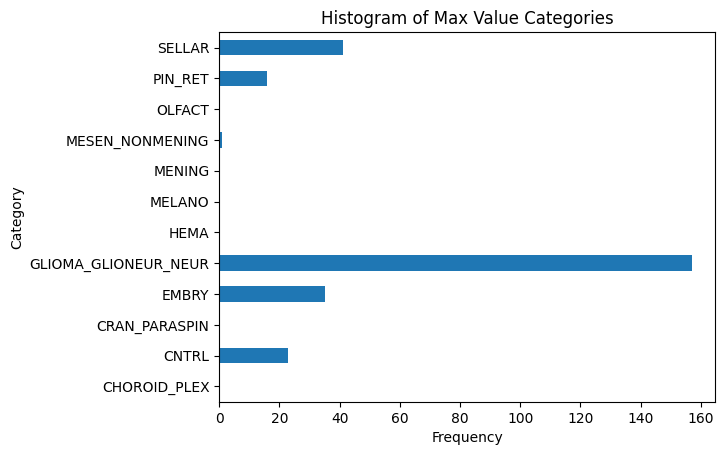

In [62]:

# Assuming tmp1 is already defined as your DataFrame
tmp2 = tmp1.idxmax(axis=1)

# Plotting the histogram horizontally
ax = tmp2.value_counts().reindex(tmp1.columns, fill_value=0).plot(kind='barh')  # 'barh' makes the bar chart horizontal
ax.set_title('Histogram of Max Value Categories')
ax.set_ylabel('Category')
ax.set_xlabel('Frequency')
plt.show()


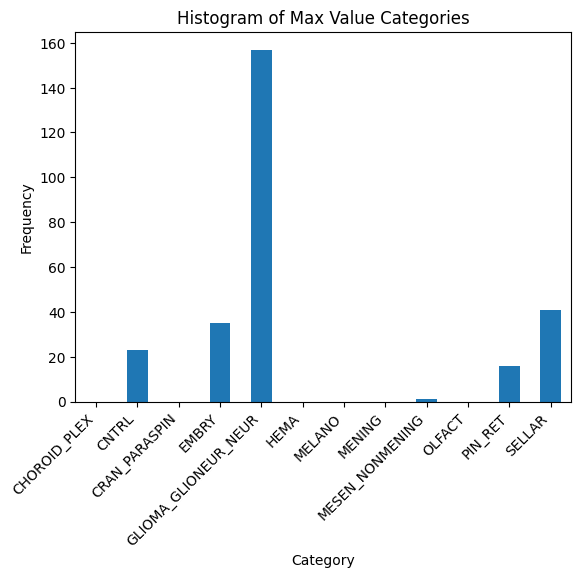

In [61]:
# Assuming tmp1 is already defined as your DataFrame
tmp2 = tmp1.idxmax(axis=1)

# Plotting the histogram
ax = tmp2.value_counts().reindex(tmp1.columns, fill_value=0).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Histogram of Max Value Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
plt.show()

In [54]:

tmp1.head(20).style.background_gradient(cmap='coolwarm', axis=None, low=0, high=1)


,CHOROID_PLEX,CNTRL,CRAN_PARASPIN,EMBRY,GLIOMA_GLIONEUR_NEUR,HEMA,MELANO,MENING,MESEN_NONMENING,OLFACT,PIN_RET,SELLAR
P6Pxl,0.033845,0.140528,0.045523,0.510743,0.124143,0.006500,0.018354,0.004808,0.034653,0.004961,0.044187,0.031755
Kit2R,0.098182,0.061909,0.007590,0.559621,0.051737,0.013507,0.003048,0.017167,0.013825,0.017218,0.091741,0.064453
Bsjm3,0.076194,0.016533,0.003449,0.624409,0.009386,0.005001,0.000095,0.006421,0.003191,0.010548,0.196652,0.048120
7t7K2,0.017538,0.190733,0.087318,0.353398,0.174017,0.005169,0.007406,0.003089,0.027217,0.008038,0.115471,0.010605
xt2C0,0.058222,0.021640,0.000907,0.247496,0.349005,0.004184,0.000000,0.002126,0.010521,0.002526,0.291380,0.011992
iwIYo,0.054777,0.068196,0.021267,0.343637,0.058941,0.013585,0.000768,0.008858,0.020617,0.017468,0.347222,0.044664
FEfR4,0.024984,0.040118,0.003667,0.252916,0.072002,0.001661,0.000000,0.000000,0.003615,0.000454,0.596421,0.004162
S9seX,0.016834,0.135502,0.099465,0.430441,0.203828,0.002515,0.013345,0.003089,0.034124,0.002959,0.031086,0.026811
NKVws,0.070487,0.023938,0.004735,0.626497,0.008933,0.006070,0.000726,0.006921,0.002534,0.012783,0.188553,0.047823
8re5X,0.007496,0.055597,0.066001,0.636651,0.110055,0.000584,0.019914,0.000337,0.044137,0.000181,0.021788,0.037259


<Axes: >

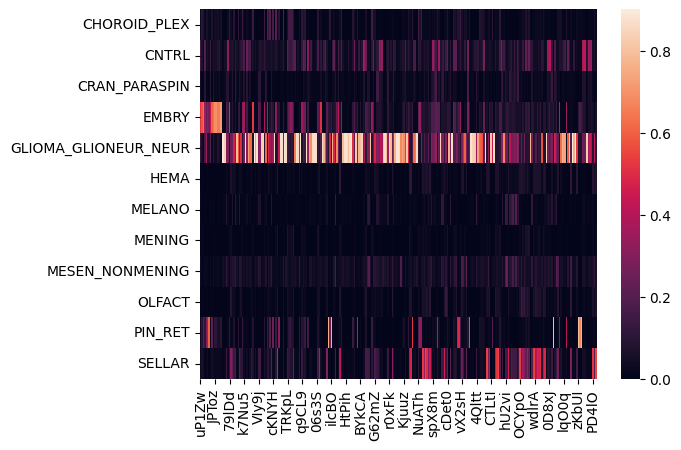

In [178]:
import seaborn as sns 


sns.heatmap(tmp1.T)

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=850)

In [142]:



model = pipeline_data['final_inference_models_dict']
model = model[list(model.keys())[2]]
# info(model)
model.predict_proba()

KNeighborsClassifier(n_neighbors=3)

In [ ]:
target_dict = pipeline_data.target_key_dict
selected_feature_dict = pipeline_data.RF_selected_feature_dict
sample_dict = pipeline_data.sample_dict

training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict)


"""
plan for now, the data is so small that we can just predict on all the models and make a visual tree for the 



predict on the hearchy so like if you put in a full 3 models then predict on all of the tree 


get in data frame, 

predict on full data for each sample 

invoke the outcome based on the oclumn names for each sample and predict the tree 

"""

In [136]:
info(pipeline_data)

type is dict
IQR_selected_feature_dict       type->   dict                        len-> 26  ...3336'],
      dtype='object')}
sample_dict                     type->   dict                        len-> 26  ...ode, Length: 273, dtype: bool}
target_key_dict                 type->   dict                        len-> 26  ...RT_DIFF'): ['Class_v12_code']}
RF_feature_importance_dict      type->   dict                        len-> 26  ...411, 0.07145791, 0.07022587])}
RF_feature_selection_model_dict type->   dict                        len-> 26  ...imators=500, random_state=42)}
RF_selected_feature_dict        type->   dict                        len-> 26  ..., 'cg09814029', 'cg03094555']}
optuna                          type->   dict                        len-> 26  ...1.0, 'IS_BEST_MODEL': False}}}
best_optuna_model_info          type->   dict                        len-> 26  ...ion_to_optimize': 'maximize'}}
final_inference_models_dict     type->   dict                        len-> 26  ...b

In [132]:
final_inference_models_dict

NameError: name 'final_inference_models_dict' is not defined

In [ ]:
class PredictData():
    def __init__(self, pipeline_data):
        self.pipeline_data = pipeline_data
    def sort_input_
        
    

In [ ]:
TFM

In [ ]:
# info(pipeline_data)

pipeline_data['best_optuna_model_info']['Full_model']['params']

In [ ]:
training_data_class = TrainingData(P_1['target_key_dict'], P_1['RF_selected_feature_dict'], P_1['sample_dict'])

for global_key in 
X, y = training_data_class.get_training_data(df, global_key)

In [ ]:
# def train_all_models(df, pipeline_data):


model = KNeighborsClassifier(params**)

model = RandomForestClassifier(params**)

for global_key in pipeline_data['ALL_global_keys']:
    X, y = training_data_class.get_training_data(df, global_key)
    build_final_model(
    
    
    



    
def models_KNN(cls, trial, y, cv_folds):


def model_RF    

In [ ]:
info(P_1)

In [ ]:
training_data_class = TrainingData(P_1['target_key_dict'], P_1['RF_selected_feature_dict'], P_1['sample_dict'])

for global_key in 
X, y = training_data_class.get_training_data(df, global_key)





In [ ]:
target_dict, selected_feature_dict, sample_dict = fclass.target_key_dict, RFFS.RF_selected_features, fclass.sample_dict
training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict)




## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## _-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

## ALL THE DICTS TO COMPILE

### CLASS FeatureSelection

In [ ]:
# dicts
fclass.selected_feature_dict
fclass.sample_dict
fclass.target_key_dict

# lists
fclass.ordered_hierarchy_keys
fclass.feature_keys

# ints 
fclass.n_levels # how many level in the hierarchy-- int 
fclass.select_top_n_features # int user sets to select top features -- int

info(fclass)

In [ ]:
info_dict.vis(fclass.selected_feature_dict['Full_model'])

In [ ]:
info_dict.vis(fclass.sample_dict)

### CLASS RandomForestFeatureSelection

In [ ]:




RFFS.RF_feature_importance_dict # for each feature passed in, number reprenting feature importance
RFFS.RF_feature_selection_model_dict # one model per each global key (model for particular superfamily family class etc) use 
# to select features, might toss this for final save. 
RFFS.RF_selected_features # index to selected features to the dataframe inputed 



# these are direct copies from the previous class
RFFS.selected_feature_dict
RFFS.sample_dict
RFFS.ordered_hierarchy_keys
RFFS.target_key_dict



info(RFFS)

In [ ]:
info_dict.vis(RFFS.RF_selected_features)



In [ ]:
info_dict.vis(RFFS.RF_feature_selection_model_dict)



### CLASS TrainingData

In [ ]:
# training_data_class is only organizing data and nothing new is created 
# if later we need to see the exact training data used for these models we will call this 
# class again and generate it this way. the class fclass and RFFS contain all the infomration 
# needed to index df to recreate this. DF will and should be stored seperately. since copied of 
# this file will increase storage a lot. 


info(training_data_class)



### CLASS TrainAllModels

In [ ]:
# for the Train all models class we use optuna so a new set of dicitonaries are created

# is the training_data_class class from above passed in so we can ignore that

# dict 
TAM.best_optuna_model_info # used to make life easier. reorganizes important data from TAM.optuna so that we dont have to dig in this. 
# contains the following where it refers only to the best model. this is waht is used to select the paramters to actually train on. 
"""
info_dict.vis(TAM.best_optuna_model_info['Full_model'])


├── model_key            : type: str, len: N/A RF
├── params               : type: dict, len: 3 {'n_estimators': 850, 'max_depth': 4, 'min_samples_split': 4}
│   ├── n_estimators     : type: int, len: N/A 850
│   ├── max_depth        : type: int, len: N/A 4
│   └── min_samples_split: type: int, len: N/A 4
├── metric_performance   : type: float, len: N/A 0.8796031427326194
├── is_multi_class       : type: bool, len: N/A True
├── n_trials             : type: int, len: N/A 10
├── cv_folds             : type: int, len: N/A 3
├── metric_to_optimize   : type: str, len: N/A roc_auc_ovr
└── direction_to_optimize: type: str, len: N/A maximize


"""
TAM.optuna # has the following structure
# L1-- heiarchy keys for each model (i.e. global_keys) 
# L2-- ---- each of the model types being compared (in this case KNN and RF but this can be expanded on at the DefaultOptunaStudies class 
# L3-- ---- ----for each model it has these keys: study, best_params, best_value, IS_BEST_MODEL. best value is best metric score of best 
# ---- ---- ----optuna model, best_params is best params of htis model and IS_BEST_MODEL is True for only one model type at L2. study is 
# ---- ---- ----the full optuna study. with added data at X['study'].metadata that look like this 
"""
TAM.optuna[('Family_code', 'PLEXUS')]['KNN']['study'].metadata


{'metric_to_optimize': 'roc_auc_ovr',
 'direction_to_optimize': 'maximize',
 'n_trials': 10,
 'cv_folds': 3,
 'is_multi_class': True,
 'binary_and_multi_class_metrics_list': ['roc_auc', 'roc_auc_ovr']}

"""


info(TAM)

In [ ]:
info(TAM.optuna)

In [ ]:
# info_dict.vis(TAM.optuna[('Family_code', 'PLEXUS')])

In [ ]:
# info_dict.vis(TAM.optuna[('Family_code', 'PLEXUS')]['KNN'])

In [ ]:
# TAM.optuna[('Family_code', 'PLEXUS')]['KNN']['study'].metadata

In [ ]:
info_dict.vis(TAM.best_optuna_model_info['Full_model'])

### CLASS ,.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.'

### CLASS ,.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.',.'

# save all the data into a single dictionary and file.

In [ ]:
# Initialize the mega_dict
mega_dict = {}

# Adding dicts from fclass
mega_dict['IQR_selected_feature_dict'] = fclass.selected_feature_dict
mega_dict['sample_dict'] = fclass.sample_dict
mega_dict['target_key_dict'] = fclass.target_key_dict

# Adding lists from fclass
mega_dict['ordered_hierarchy_keys'] = fclass.ordered_hierarchy_keys
mega_dict['feature_keys'] = fclass.feature_keys

# Adding ints from fclass
mega_dict['n_hierarchy_levels'] = fclass.n_levels
mega_dict['IQR_select_top_n_features'] = fclass.select_top_n_features

# Adding attributes from RFFS
mega_dict['RF_feature_importance_dict'] = RFFS.RF_feature_importance_dict
mega_dict['RF_feature_selection_model_dict'] = RFFS.RF_feature_selection_model_dict
mega_dict['RF_selected_feature_dict'] = RFFS.RF_selected_features

# Adding attributes from TAM
mega_dict['optuna'] = TAM.optuna
mega_dict['best_optuna_model_info'] = TAM.best_optuna_model_info

# The mega_dict now contains all the selected keys and their values from the different classes.


In [ ]:
info(mega_dict)


In [ ]:


bd = '/Users/pmaire/Downloads/'+os.sep
PickleHelper.save(mega_dict, bd+'mega_dict_full')

In [ ]:
keys_list = []
for k in mega_dict:
    if isinstance(mega_dict[k], dict):
        keys_list.append(list(mega_dict[k].keys()))
    else:
        print(k)


In [ ]:
tmp1 = """ordered_hierarchy_keys
feature_keys
n_hierarchy_levels
IQR_select_top_n_features"""

tmp1 = tmp1.split('\n')
for k in tmp1:
    print(mega_dict[k])




    

In [ ]:


"""
tests to allow for partial retraining 

feature_keys              must all be the same else retrain everything
n_hierarchy_levels        must all be the same else retrain everything
ordered_hierarchy_keys    must all be the same else retrain everything
gloabl_keys               must all be the same else retrain everything


what triggers retraining? if sample list has a new sample 
add a all feature and all samples as seperate things-- 
note all features are already in "feature_keys" but nameing could be better 

if all_samples_index changes at all then trigger sample chekc for each individual global key. 
where new smaples exist use these global keys to extract only the data where it does exist. 

but wait... if new sample then all samples needed for full model so this doesnt seem to work


ooooooo i can literally just take out the parts I dont want to retrain so like remove them from 
the IQR feature selection part and then all the others shoudl be ignored let me try that now





IQR_select_top_n_features

"""

""

# Program To-Do List

## Mega Dictionary Setup
- For each class, set up a **save section** to save the important information for the mega dictionary.
- Ensure variable names are specific and clear for easy loading.
- Upload these save sections for each class upon calling them, to compile them into the mega dictionary.

## Train All Model Module
- Build a **Train All Model** module.
- This module should be agnostic towards receiving a full set of models or just a partial set.
- Ensure flexibility in handling different model sets.

## Combined if Partial Train Model
- Create a module for handling partial training sessions.
- If it's a partial train, it must check for a previous model and decide on retraining.
- Combine old models with new trained models, keeping unchanged parts intact.

## Generalized Linear Model Head
- Add a **Generalized Linear Model Head** for consistency with previous methods.
- Implement model saving into a complete dictionary and a pickled file.

## Model Testing and Consistency
- Test loading different models to ensure consistency across models.
- Verify that models work as intended post-load, using test data.

## Retrain Logic
- Implement logic to handle retraining conditions:
  - Retrain if feature keys have changed.
  - Retrain if the number of hierarchy levels differs.
  - Retrain if the order of hierarchy keys changes.
  - Retrain if global keys change.
- Global keys represent the unique names for the full model and each sub-model.

## Training Session Triggers
- Establish conditions that trigger a new training session:
  - Check if the list of new samples matches the sample dictionary.
  - Ensure only additional data points have been added, without any removals.
  - Retrain the whole model if any data points have been removed.
  - Trigger sample checks for new samples under each relevant global key.



In [ ]:
for k in mega_dict:

    info_dict.vis(mega_dict, [[k]])
    print('_____________________________________________________________________________')
    

In [ ]:
info_dict.vis(mega_dict)

# train final models

In [ ]:
global_key = ('Superfamily_code', 'CNTRL')


X, y = training_data_class.get_training_data(df, global_key)

"""
add a simple builder that works without any explicit inout, it just grabs the dict and builds it from there. 


also fix it so that the index is a uniqu KEY 

"""



In [ ]:
X

In [ ]:
y

In [ ]:
# load preset model type and model params 


mega_dict['best_optuna_model_info'][global_key]
"""
here is where having a standard name for each model type would be super helpful and why it is workth your time to do this 




"""